### Importing Packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data
from remove-outliers.remove import remove_outlier

SyntaxError: invalid syntax (1406745794.py, line 6)

### Import and Load Dataset

In [2]:
#Load datasets
df = pd.read_csv("./Datasets/sales_train.csv")


In [3]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [5]:
df.shape

(2935849, 6)

In [6]:
print("Dataset has {} data  with {} variables each.".format(*df.shape))

Dataset has 2935849 data  with 6 variables each.


In [7]:
# statistical measure of dataset
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [8]:
#Get information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [9]:
#check missing values
df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

### Exploratory Data Analysis

#### Analyze sales per store

<function matplotlib.pyplot.show(close=None, block=None)>

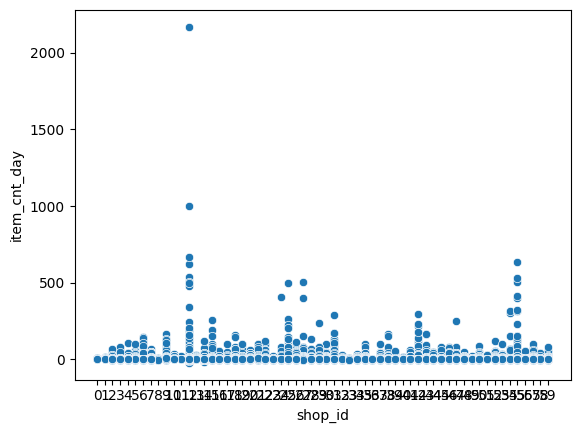

In [11]:
# Scatter plot
sns.scatterplot(data=df, y="item_cnt_day",x="shop_id")
plt.xticks(range(0,60,1))
plt.show


In [30]:
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


### Remove the outliers from the DataFrame

In [58]:
# Calculate the first and third quartile (Q1 y Q3)
Q1 = df['item_cnt_day'].quantile(0.25)
Q3 = df['item_cnt_day'].quantile(0.75)

# CCalculate the interqualtile range (IQR)
IQR = Q3 - Q1

# Define the limits to identify outliers
lower_limit = 0
upper_limit = 1100

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['item_cnt_day'] >= lower_limit) & (df['item_cnt_day'] <= upper_limit)]

### Visualize sales by store

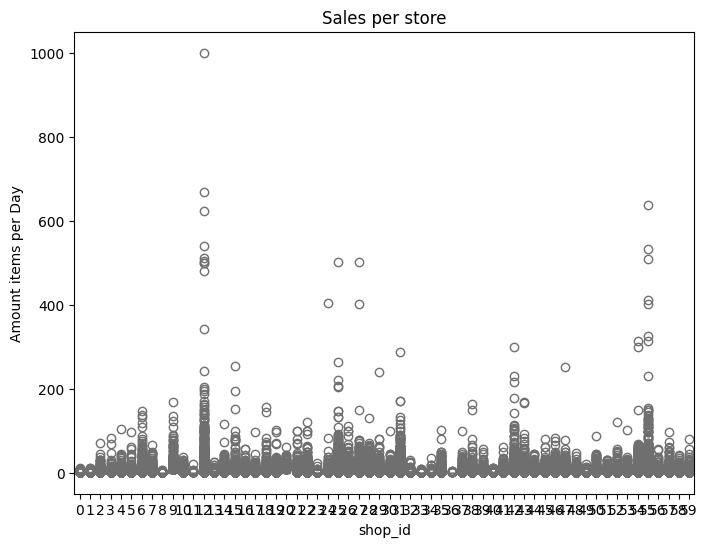

In [63]:

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_no_outliers['item_cnt_day'], x=df_no_outliers['shop_id'], color='skyblue')
plt.title('Sales per store')
plt.ylabel('Amount items per Day')
plt.show()